Разберу здесь https://arxiv.org/pdf/1904.09314.pdf



In [1]:
import networkx as nx

https://lucaman99.github.io/new_blog/2020/mar16.html - some code for graphs and solving graph problems

3
[0, 1, 2]


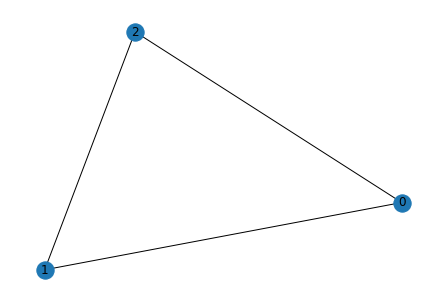

In [29]:
NODES = 3
COLORS = 3

g = nx.Graph()
for i in range(nodes): 
    g.add_node(i)
g.add_edge(1,0)
g.add_edge(1,2)
g.add_edge(0,2)

nx.draw(g, with_labels = True)
print(g.number_of_nodes())
print(g.nodes())

Так как для поиска хроматического числа получается очень сложный миксер гамильтониан и одно из решений, которое я вижу, это разрешить число цветов не больше трех, я попробую "нахождение максимального правильно раскрашенного подграфа"

Не, я все неправильно поняла. Там это количество соседних вершин, так что я не знаю как это реализововать



Граф $G = (V, E)$, $|V| = n, |E| = m$, найти максимальный подграф, который раскрашивается в $k=3$ цвета.

Раскраска характеризуется переменными $x_{v0} \dots x_{vk}$, где 0 - нулевой цвет. Нулевым цветом раскрашены нераскрашенные вершины.

Целевой функцией будет сумма по всем цветам, кроме нулевого $$ C = \sum_v \sum_{j=1}^k x_{vi}$$

Соответствующий гамельтониан: $$ C = \frac{1}{2}(mI -  \sum_v \sum_{j=1}^k Z_{vi})$$


In [ ]:
from qiskit import QuantumCircuit

In [27]:
#colors выглядит как список из целых значений, где значение -- цвет
def objective_function(bitstring, n):
    bitstring = [int(bit) for bit in bitstring]
    r = []
    for i in range(0, n * (COLORS + 1), COLORS + 1):
        r += bitstring[i + 1: i + COLORS + 1]
    print(r)
    return sum(r)

objective_function('010000100100', NODES)

[1, 0, 0, 0, 1, 0, 1, 0, 0]


3

In [ ]:
def brute_force(graph):
    pass

In [20]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

#пока полагаю, что это строка длины n*n, где место цвета определяет его номер
def colors_from_bitstring(bs, n, c):
    l = [int(bit) for bit in bs]
    return [l[i : i + c].index(1) for i in range(0, n*c, c)]

In [ ]:
def compute_expectation(counts, n):
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        obj = objective_function(bitstring, n)
        avg += obj * count
        sum_count += count

    return avg / sum_count

In [ ]:
def create_qaoa_circ(graph, theta):
    nqubits = graph.number_of_nodes() * (COLORS + 1)

    p = len(theta) // 2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)

    beta = theta[:p]
    gamma = theta[p:]

    # initial_state ??? what would be initial state?
    for i in range(0, nqubits):
        qc.h(i)

    for irep in range(0, p):

        # problem unitary: gamma
        # easy part
        for v in graph.nodes():
            for i in range(1, COLORS + 1):
                qc.rz(- gamma[irep], v * (COLORS + 1) + i)

        # mixer unitary: beta
        # hard part
        # i have to implement П(I-Z)
        for (u, v) in graph.edges():
            pass
            

    qc.measure_all()

    return qc